Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

Loading dataset

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Exploring train dataset

In [3]:
train_df.shape

(8693, 14)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [6]:
#Dropping unnecessary columns from the dataset

train_df.drop(['PassengerId','Name'], axis=1, inplace=True)

In [7]:
#Checking for missing values

train_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [8]:
#Checking value counts of each dataset columns

for feature in train_df.columns:
    print(f'The value count of {feature} are \n{train_df[feature].value_counts()}')
    print(100*'-')

The value count of HomePlanet are 
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
----------------------------------------------------------------------------------------------------
The value count of CryoSleep are 
False    5439
True     3037
Name: CryoSleep, dtype: int64
----------------------------------------------------------------------------------------------------
The value count of Cabin are 
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
----------------------------------------------------------------------------------------------------
The value count of Destination are 
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
----------------------------------------------------------------------------------------------------
The value count of Age are 
24.0   

Missing value Treatment

In [9]:
# splitting columns to fill missing values to different operations

mode_op = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination']
median_op = ['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [10]:
# Replacing null values with mode()
for feature in mode_op:
    train_df[feature].fillna(train_df[feature].mode()[0], inplace=True)

In [11]:
# Replacing null values with median()

for feature in median_op:
    train_df[feature].fillna(train_df[feature].median(), inplace=True)

In [12]:
numericalColumns = train_df.select_dtypes(include=np.number).columns
print(f'List of numeric columns\n{numericalColumns}')

objectColumns = train_df.select_dtypes(include=np.object).columns
print(f'List of object columns \n{objectColumns}')

List of numeric columns
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
List of object columns 
Index(['HomePlanet', 'Cabin', 'Destination', 'VIP'], dtype='object')


In [13]:
for convert in numericalColumns:
    train_df[convert] = train_df[convert].astype(int)

In [14]:
train_df['CryoSleep'] = train_df['CryoSleep'].map({False : 0, True : 1})
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)

Text(0.5, 1.0, 'Target Distribution')

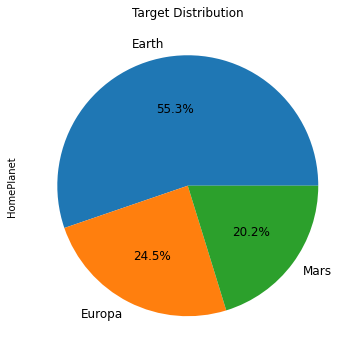

In [15]:
plt.figure(figsize = (10,6))
train_df['HomePlanet'].value_counts().plot.pie(textprops={'fontsize' : 12},autopct='%1.1f%%').set_title('Target Distribution')

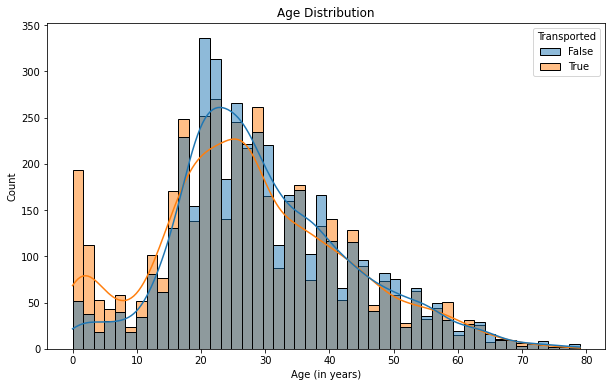

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, hue='Transported', x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (in years)')
plt.show()

In [ ]:
# plt.figure(figsize=(10,6))
# sns.catplot(kind='bar', data=train_df, x='Destination', hue='Transported')
# plt.show()

In [18]:
# Converting objects into integers using LabelEncoder
dataObjectDF = train_df[objectColumns]

defaultEncoder= defaultdict(LabelEncoder)

# variable enconding
fittrainObjectDF= dataObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))

In [19]:
# Dropping the objectColumns and concatinating encoded variable to the dataset

train_df.drop(objectColumns, axis=1, inplace=True)
train_df = pd.concat([fittrainObjectDF, train_df], axis=1)

In [20]:
train_df['Cabin'].nunique()

6560

In [21]:
#dropping cabin because of too much distint values

train_df =train_df.drop(['Cabin'], axis=1)

In [22]:
train_df['Transported'] = train_df['Transported'].map({False : 0, True: 1})

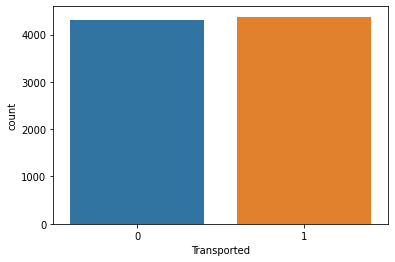

In [23]:
sns.countplot(x = 'Transported', data = train_df)
plt.show()

Text(0.5, 1.0, 'Target Distribution')

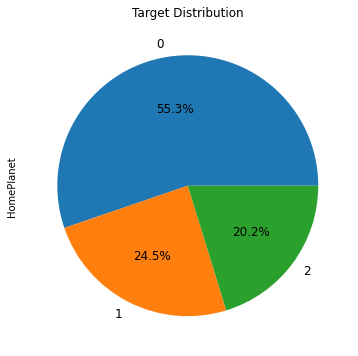

In [24]:
plt.figure(figsize = (10,6))
train_df['HomePlanet'].value_counts().plot.pie(textprops={'fontsize' : 12},autopct='%1.1f%%').set_title('Target Distribution')

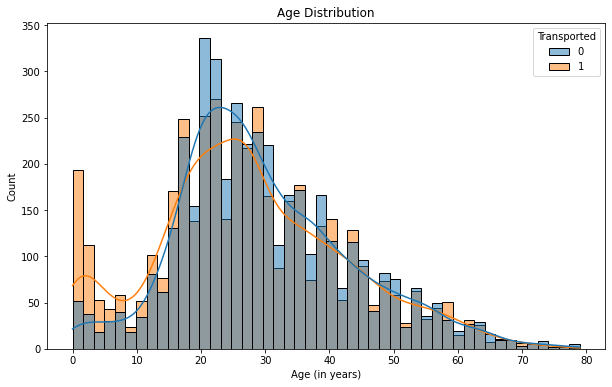

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, hue='Transported', x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (in years)')
plt.show()